In [1]:
import os

In [2]:
import problem
import workflow.local_workflow as local_workflow
from workflow.scores import score_craters_on_patch

In [3]:
workflow = local_workflow.ObjectDetector(
    test_batch_size=16,
    chunk_size=50,
    n_jobs=8)

In [4]:
submission = 'image_processing'

In [5]:
module_path = os.path.join('.', 'submissions', submission)

In [6]:
X_train, y_train = problem.get_train_data(path='.')
X_test, y_test = problem.get_test_data(path='.')

In [7]:
trained_workflow = workflow.train_submission(
            module_path, X_train, y_train, train_is=None)

In [8]:
%pdb

Automatic pdb calling has been turned ON


In [8]:
y_pred_train = workflow.test_submission(trained_workflow, X_train[:100])

Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.5625
Max val:  0.675
Max val:  0.589285714286
Max val:  0.625
Max val:  0.6
Max val:  0.59375
Max val:  0.6875
Max val:  0.75
Max val:  0.645833333333
Max val:  0.625
Max val:  0.625
Max val:  0.53125
Max val:  0.65625
Max val:  0.46875
Max val:  0.5
Max val:  0.40625
Max val:  0.5625
Max val:  0.625
Max val:  0.46875
Max val:  0.46875
Max val:  0.46875
Max val:  0.34375
Max val:  0.40625
Max val:  0.21875
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.21875
Max val:  0.40625
Max val:  0.4375
Max val:  0.5
Max val:  0.59375
Max val:  0.479166666667
Max val:  0.53125
Max val:  0.25
Max val:  0.5625
Max val:  0.6875
Max val:  0.60416666666

In [9]:
y_pred_train

[[],
 [],
 [],
 [(213, 113, 5),
  (210, 177, 5),
  (172, 205, 5),
  (170, 53, 6),
  (166, 56, 10),
  (170, 52, 5),
  (211, 180, 6),
  (191, 73, 5),
  (207, 204, 5),
  (211, 213, 5),
  (190, 72, 6),
  (165, 96, 6),
  (171, 207, 6)],
 [(70, 168, 6),
  (132, 153, 6),
  (160, 180, 5),
  (39, 114, 5),
  (81, 45, 6),
  (132, 154, 5),
  (172, 147, 5),
  (48, 183, 5),
  (98, 124, 5),
  (36, 177, 5),
  (139, 51, 5),
  (127, 161, 5),
  (189, 165, 5),
  (98, 170, 5),
  (83, 45, 5),
  (79, 45, 5),
  (138, 52, 6),
  (181, 175, 5),
  (155, 175, 5),
  (71, 168, 5),
  (132, 68, 5),
  (132, 10, 5),
  (189, 163, 5),
  (137, 73, 5),
  (128, 12, 9),
  (131, 74, 7),
  (81, 46, 7),
  (106, 54, 7),
  (137, 70, 6),
  (217, 25, 5),
  (85, 91, 5),
  (85, 143, 5),
  (127, 159, 5),
  (176, 181, 5),
  (134, 71, 9),
  (130, 13, 7),
  (129, 13, 8),
  (108, 107, 8),
  (137, 72, 6),
  (98, 126, 6),
  (218, 112, 5),
  (148, 122, 5),
  (175, 183, 5),
  (90, 192, 5),
  (120, 71, 5),
  (127, 12, 10),
  (138, 70, 7),
  (12

In [13]:
y_true = y_train[:100]

In [62]:
[score_craters_on_patch(t, p) for t, p in zip(y_true, y_pred_train)][55:]

[0,
 0,
 0,
 1,
 0.074441610404256897,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
np.mean([score_craters_on_patch(t, p) for t, p in zip(y_true, y_pred_train[:60])])

0.51790736017340433

In [16]:
from workflow.predictions import Predictions
from workflow.scores import Ospa

In [21]:
predictions_test = problem.Predictions(y_pred=y_pred_train)
ground_truth_test = problem.Predictions(y_true=y_true)

In [22]:
score_type = Ospa()

In [23]:
score_type.score_function(ground_truth_test, predictions_test)

0.0029776644161702759

So conclusion: current model does not work at all :-)

In [56]:
%matplotlib inline

In [65]:
import matplotlib.pyplot as plt

from skimage.draw import circle_perimeter
from skimage import data, color

def plot_prediction(X, y_true, y_pred, i=None):
    if i is not None:
        img_orig = X[i]
        true = y_true[i]
        pred = y_pred[i]
    else:
        img_orig = X
        true = y_true
        pred = y_pred
    
    
    print("Score: ", score_craters_on_patch(true, pred))
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
    
    ax[0].imshow(img_orig, cmap=plt.cm.gray)
    
    p = 50

    img = np.zeros((224 + p*2, 224 + p*2))
    img = color.gray2rgb(img)

    for center_y, center_x, radius in pred:
        circy, circx = circle_perimeter(int(center_y) + p, int(center_x) + p, int(radius))
        img[circy, circx] = (220, 20, 20)

    for center_y, center_x, radius in true:
        circy, circx = circle_perimeter(int(center_y) + p, int(center_x) + p, int(radius))
        img[circy, circx] = (20, 220, 20)
        
    ax[1].imshow(img[p:-p, p:-p])
    
    return fig, ax


Score:  0


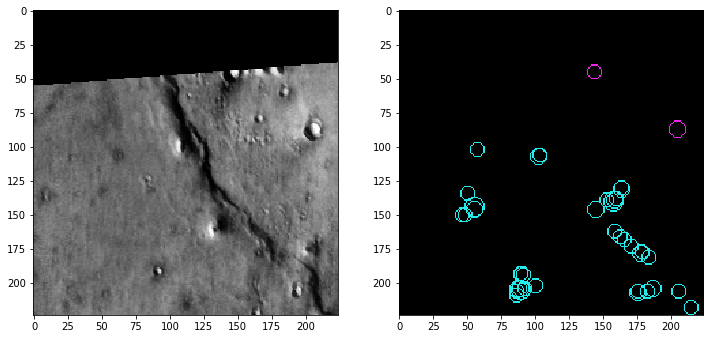

In [66]:
fig, ax = plot_prediction(X_train, y_true, y_pred_train, 70)

Score:  0


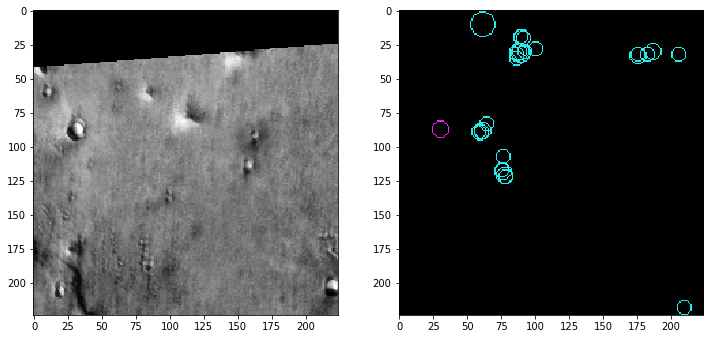

In [67]:
fig, ax = plot_prediction(X_train, y_true, y_pred_train, 71)

Score:  0.0744416104043


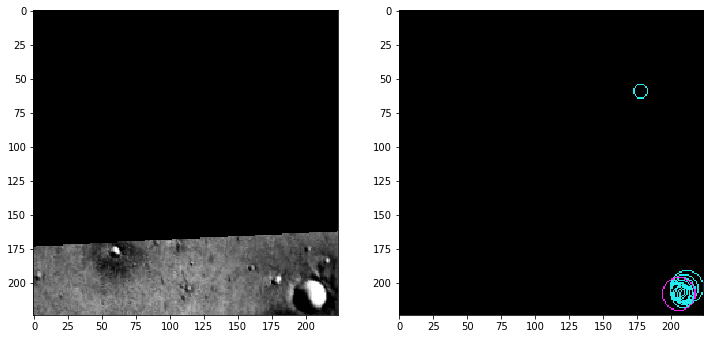

In [68]:
fig, ax = plot_prediction(X_train, y_true, y_pred_train, 59)

Problem with many overlapping predictions -> low score although this is a good prediction in the above case.